In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


Q.2. Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
df= pd.read_csv("/content/Salary_Data - Copy.csv")

#Performing EDA On Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.isnull().sum() #checking null value


YearsExperience    0
Salary             0
dtype: int64

In [6]:
df[df.duplicated()].shape #checking dublicate value

(0, 2)

In [10]:
df1=df.rename({"YearsExperience":"YE","Salary":"Sal"},axis=1)
df1

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#Data Visualization

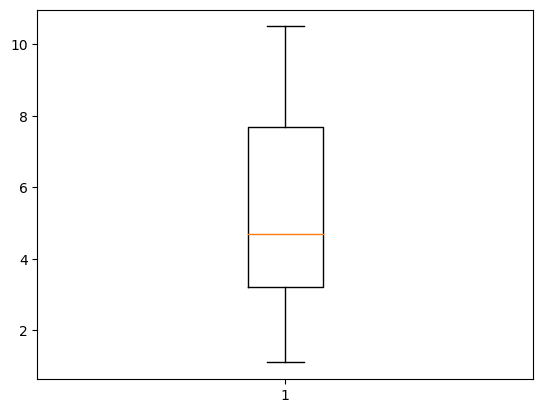

In [11]:
plt.boxplot(df1['YE'])
plt.show()

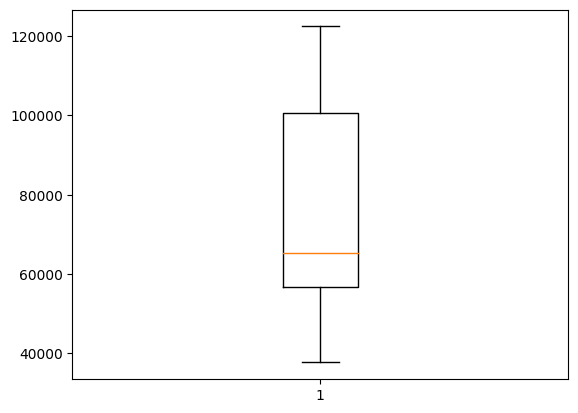

In [13]:
plt.boxplot(df1['Sal'])
plt.show()

In [ ]:
#there are no outliers

<ipython-input-18-3df0c51ad10a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['YE'])


<Axes: xlabel='YE', ylabel='Density'>

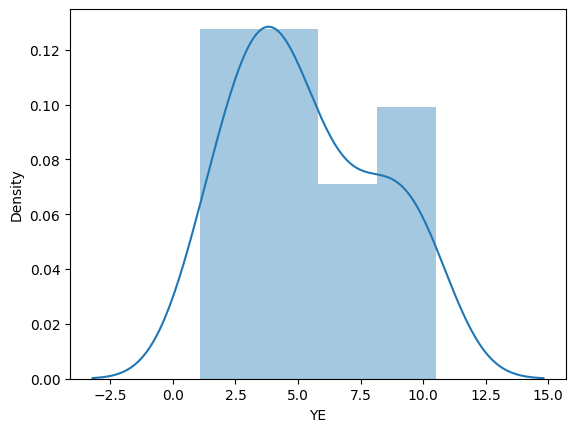

In [18]:
sns.distplot(df1['YE'])

<ipython-input-19-3db8adfa9603>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Sal'])


<Axes: xlabel='Sal', ylabel='Density'>

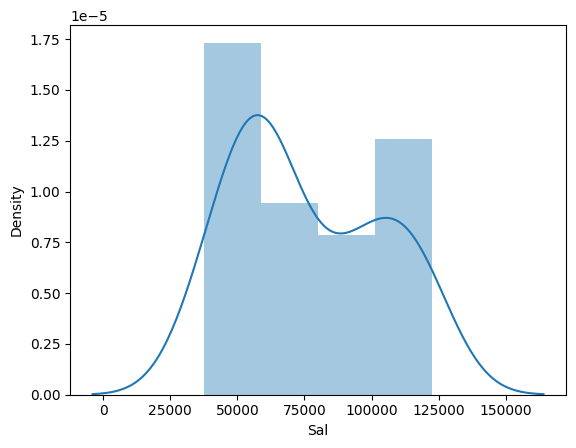

In [19]:
sns.distplot(df1['Sal'])

In [20]:
#Correlation analysis
df1.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


<ipython-input-21-f577d2f961db>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sal'])
<ipython-input-21-f577d2f961db>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YE'])


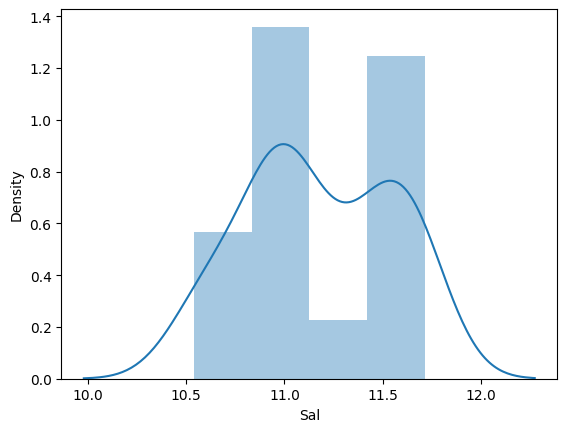

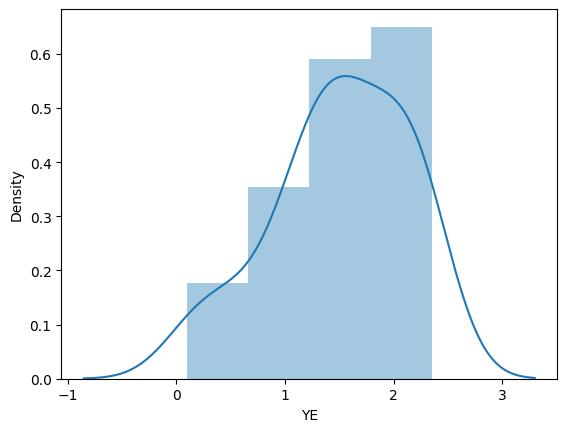

<Figure size 640x480 with 0 Axes>

In [21]:
# Performing Log transformations

data=df1
data['Sal'] = np.log(data['Sal'])
data['YE'] = np.log(data['YE'])
sns.distplot(data['Sal'])
fig = plt.figure()
sns.distplot(data['YE'])
fig = plt.figure()

<ipython-input-22-2ce2f9c83f20>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_sqrt['Sal'])
<ipython-input-22-2ce2f9c83f20>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_sqrt['YE'])


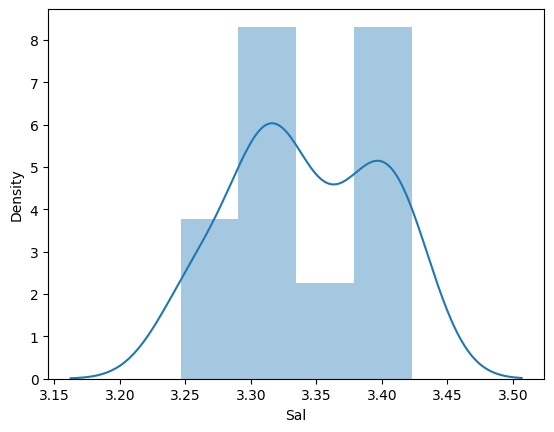

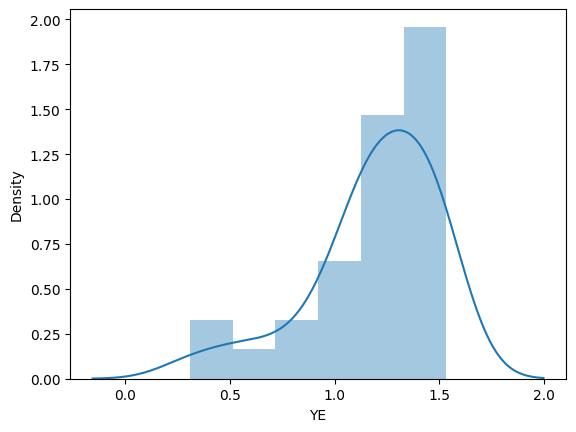

<Figure size 640x480 with 0 Axes>

In [22]:
# Performing sqrt transformations
data_sqrt =df1
data_sqrt['Sal'] = np.sqrt(data_sqrt['Sal'])
data_sqrt['YE'] = np.sqrt(data_sqrt['YE'])
sns.distplot(data_sqrt['Sal'])
fig = plt.figure()
sns.distplot(data_sqrt['YE'])
fig = plt.figure()

#Model Building

In [24]:
model=smf.ols('Sal~YE',data=df1).fit()

<Axes: xlabel='YE', ylabel='Sal'>

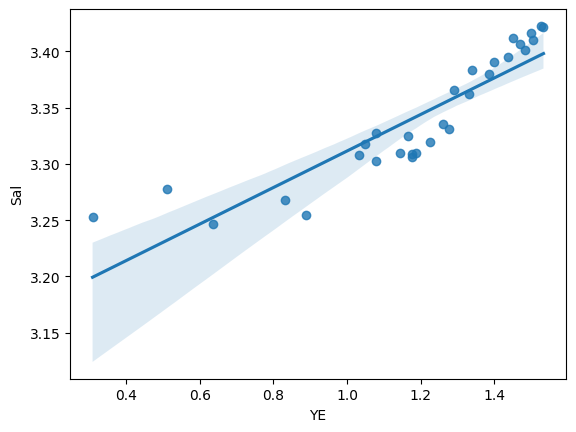

In [34]:
sns.regplot(x=data_sqrt['YE'],y=data_sqrt['Sal'])

<Axes: xlabel='YE', ylabel='Sal'>

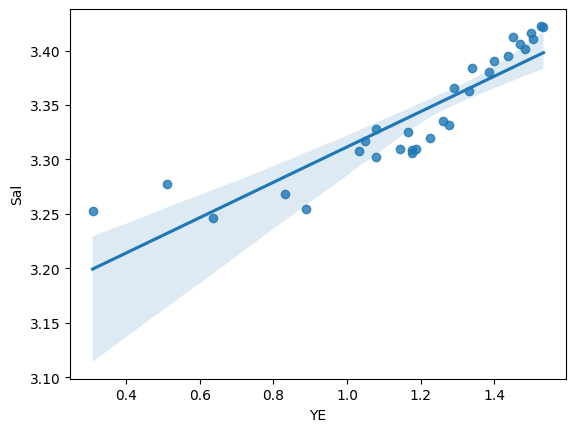

In [35]:
sns.regplot(x=data['YE'],y=data['Sal'])

In [25]:
model.params

Intercept    3.149146
YE           0.162391
dtype: float64

In [26]:
model.tvalues, model.pvalues

(Intercept    170.844633
 YE            10.807746
 dtype: float64,
 Intercept    8.245625e-44
 YE           1.686084e-11
 dtype: float64)

In [27]:
model.rsquared , model.rsquared_adj

(0.8066396839912043, 0.7997339584194616)

#Model Predictions


In [28]:
# Manual prediction for say 3 Years Experience
Salary = (3.149146) + (0.162391)*(3)
Salary


3.636319

In [ ]:
# Automatic Prediction for say 3 & 5 Years Experience

In [29]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [31]:
data_pred=pd.DataFrame(new_data,columns=['YE'])
data_pred

,YE
0,3
1,5


In [32]:
model.predict(data_pred) # model - regression model

0    3.636319
1    3.961100
dtype: float64